In [173]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [174]:
df = pd.read_csv("train.csv")

In [175]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [176]:
df.shape

(1000000, 10)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


In [178]:
df.duplicated().count()

np.int64(1000000)

In [179]:
df = df.drop(columns=["id","store_and_fwd_flag"],axis=True)

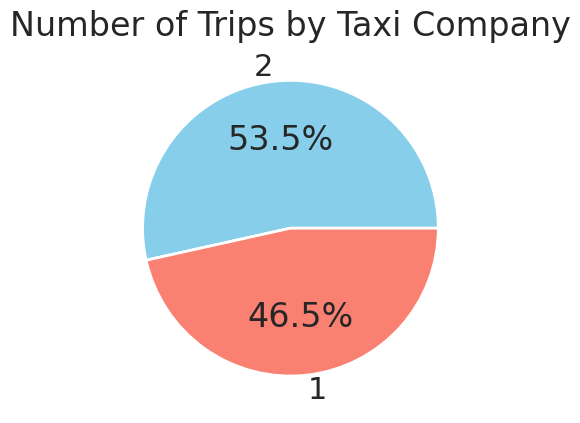

In [180]:
plt.pie(df["vendor_id"].value_counts(), labels=df["vendor_id"].value_counts().keys(), autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Number of Trips by Taxi Company')
plt.show()

In [181]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [182]:
df["pickup_year"] = df["pickup_datetime"].dt.year
df["pickup_month"] = df["pickup_datetime"].dt.month
df["pickup_day"] = df["pickup_datetime"].dt.day
df["pickup_hour"] = df.pickup_datetime.dt.hour
df['dayofyear'] = df.pickup_datetime.dt.dayofyear

df["pickup_dayofweek"] = df["pickup_datetime"].dt.dayofweek

In [183]:
df = df.drop(columns=["pickup_datetime"])

In [184]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,dayofyear,pickup_dayofweek
0,2,1,-73.985611,40.735943,-73.980331,40.760468,1040,2016,6,8,7,160,2
1,2,1,-73.978394,40.764351,-73.991623,40.749859,827,2016,4,3,12,94,6
2,2,5,-73.989059,40.744389,-73.973381,40.748692,614,2016,6,5,2,157,6
3,2,2,-73.990326,40.731136,-73.991264,40.748917,867,2016,5,5,17,126,3
4,1,4,-73.789497,40.646675,-73.987137,40.759232,4967,2016,5,12,17,133,3


In [185]:
df["pickup_year"].value_counts()

,count
pickup_year,
2016,1000000


In [186]:
df = df.drop(columns=["pickup_year"])

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   vendor_id          1000000 non-null  int64  
 1   passenger_count    1000000 non-null  int64  
 2   pickup_longitude   1000000 non-null  float64
 3   pickup_latitude    1000000 non-null  float64
 4   dropoff_longitude  1000000 non-null  float64
 5   dropoff_latitude   1000000 non-null  float64
 6   trip_duration      1000000 non-null  int64  
 7   pickup_month       1000000 non-null  int32  
 8   pickup_day         1000000 non-null  int32  
 9   pickup_hour        1000000 non-null  int32  
 10  dayofyear          1000000 non-null  int32  
 11  pickup_dayofweek   1000000 non-null  int32  
dtypes: float64(4), int32(5), int64(3)
memory usage: 72.5 MB


In [188]:
import math

def euclidean_distance_row(row):
    # constants
    km_per_degree_lat = 111  # approx. km per degree latitude

    # longitude correction depends on latitude
    avg_lat_rad = math.radians((row['pickup_latitude'] + row['dropoff_latitude']) / 2)
    km_per_degree_lon = 111 * math.cos(avg_lat_rad)

    dx = (row['dropoff_longitude'] - row['pickup_longitude']) * km_per_degree_lon
    dy = (row['dropoff_latitude'] - row['pickup_latitude']) * km_per_degree_lat

    return math.sqrt(dx**2 + dy**2)


In [189]:
df['euclidean_distance'] = df.apply(euclidean_distance_row, axis=1)

In [190]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,dayofyear,pickup_dayofweek,euclidean_distance
0,2,1,-73.985611,40.735943,-73.980331,40.760468,1040,6,8,7,160,2,2.758206
1,2,1,-73.978394,40.764351,-73.991623,40.749859,827,4,3,12,94,6,1.955744
2,2,5,-73.989059,40.744389,-73.973381,40.748692,614,6,5,2,157,6,1.402309
3,2,2,-73.990326,40.731136,-73.991264,40.748917,867,5,5,17,126,3,1.975191
4,1,4,-73.789497,40.646675,-73.987137,40.759232,4967,5,12,17,133,3,20.801226


In [191]:
df['trip_duration_log'] = np.log1p(df['trip_duration'])
df.drop('trip_duration', axis=1, inplace=True)

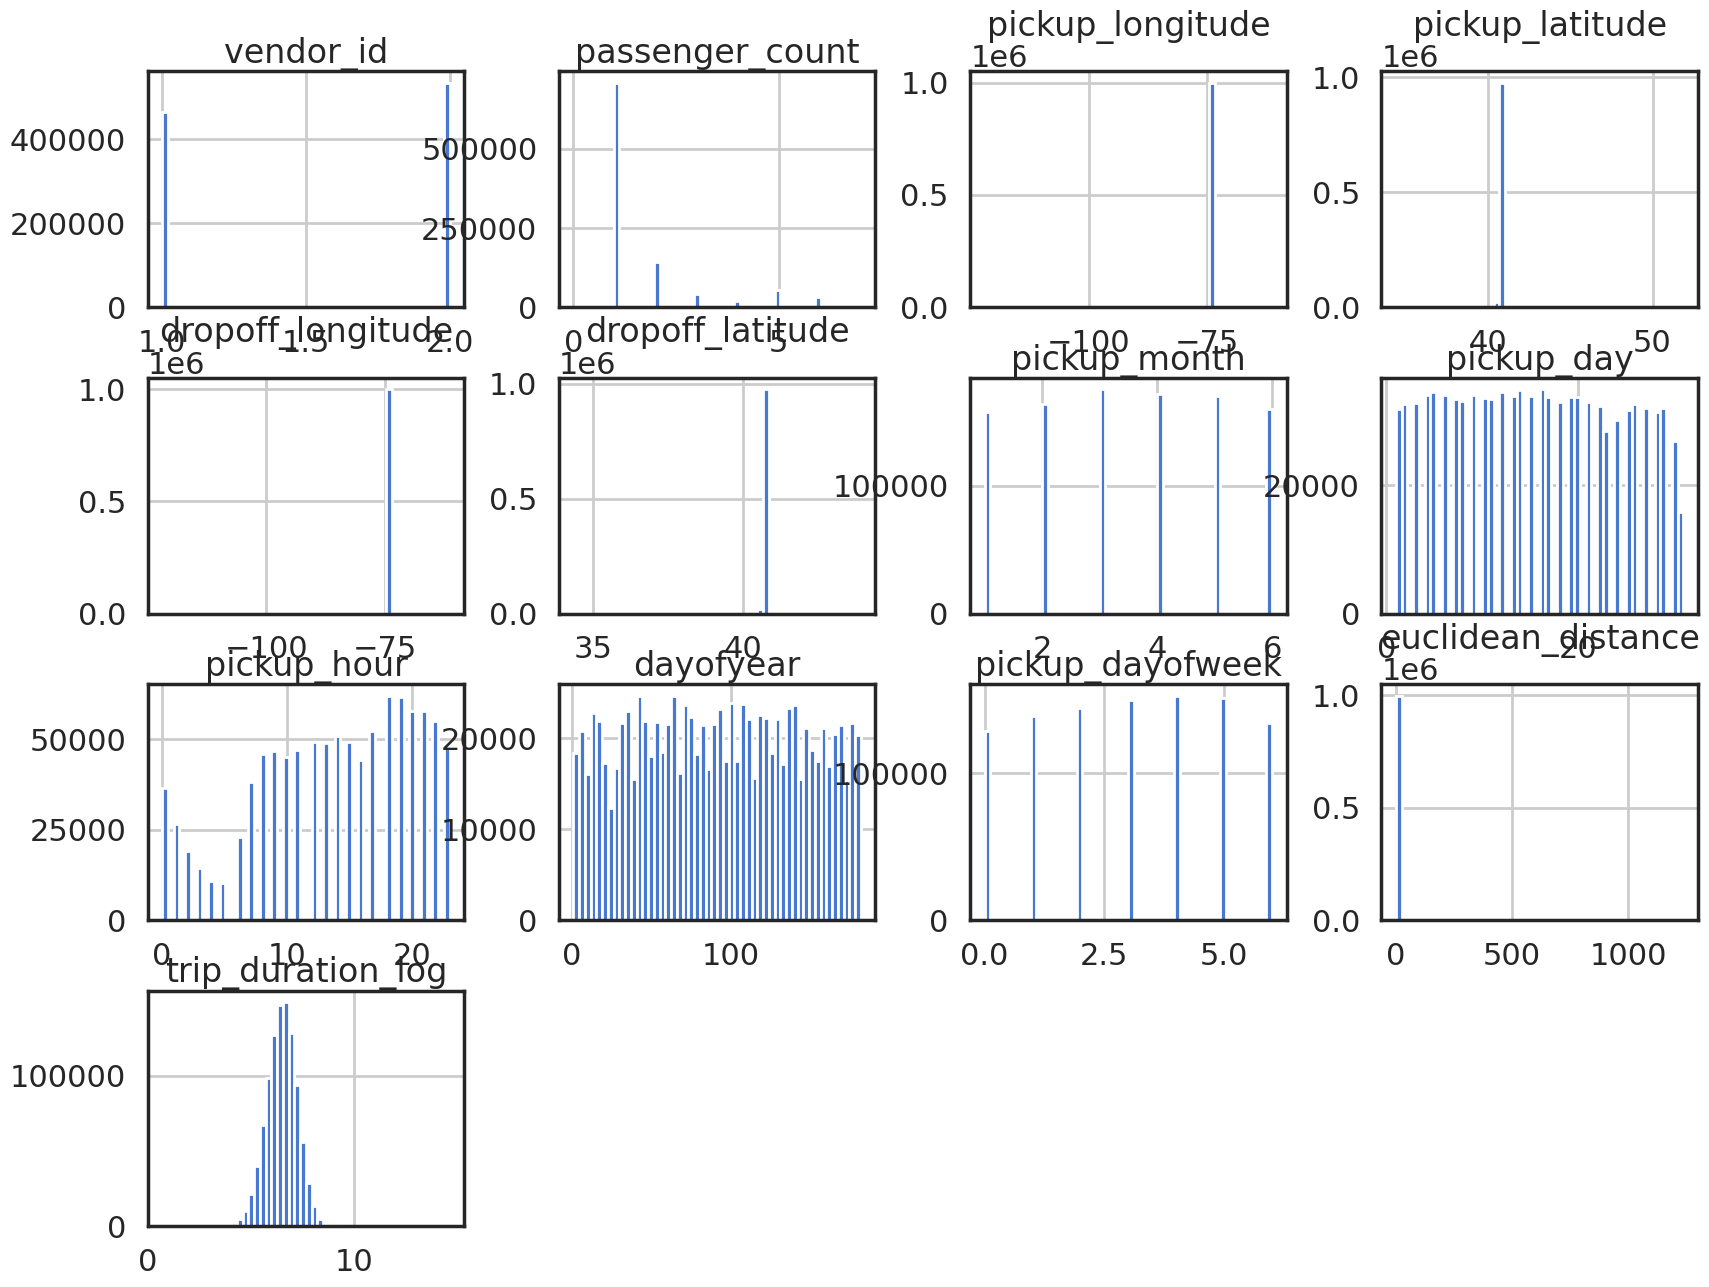

In [192]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [193]:
df["euclidean_distance"].mean()

np.float64(3.433071790636252)

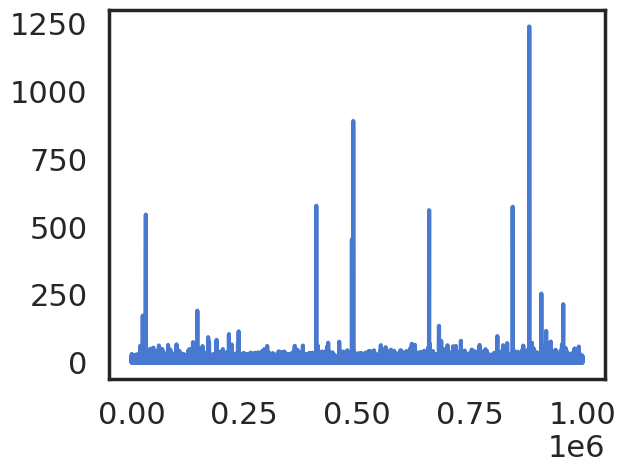

In [194]:
plt.plot(df["euclidean_distance"])

In [195]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_month', 'pickup_day',
       'pickup_hour', 'dayofyear', 'pickup_dayofweek', 'euclidean_distance',
       'trip_duration_log'],
      dtype='object')

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

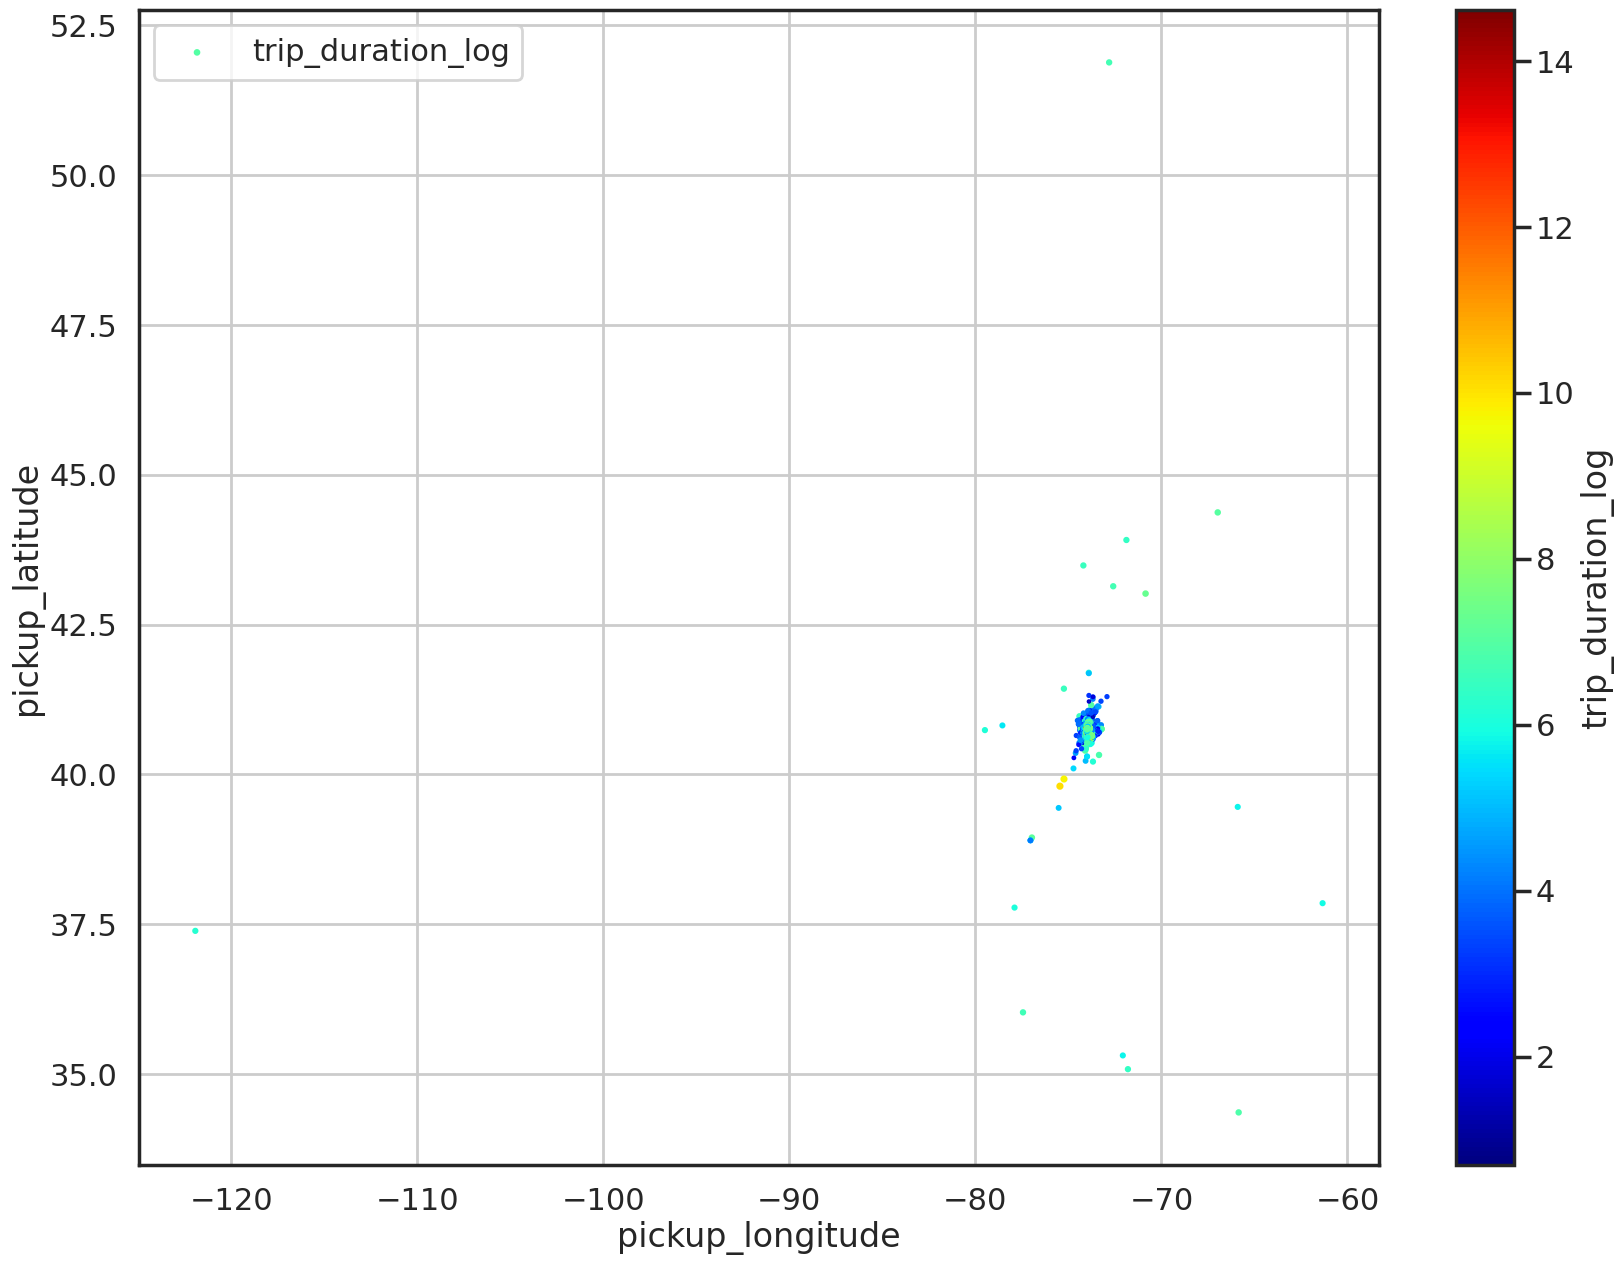

In [196]:
df.plot(
    kind="scatter",
    x="pickup_longitude",
    y="pickup_latitude",
    grid=True,
    s=df['trip_duration_log'],        # size of points
    label="trip_duration_log",        # corrected spelling
    c="trip_duration_log",            # color
    figsize=(20,15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    legend=True,
    sharex=False,
)


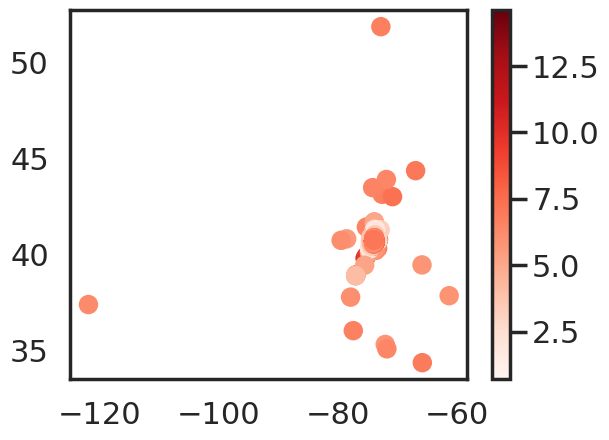

In [197]:
plt.scatter(df["pickup_longitude"],df["pickup_latitude"],c=df["trip_duration_log"],cmap="Reds")
plt.colorbar()

In [198]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_hour,dayofyear,pickup_dayofweek,euclidean_distance,trip_duration_log
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.534793,1.665353,-73.973475,40.750947,-73.973421,40.751829,3.515209,15.499299,13.604165,91.782587,3.051486,3.433072,6.466492
std,0.498788,1.315723,0.065404,0.033745,0.065432,0.035782,1.681171,8.698902,6.400685,51.568309,1.954644,4.416744,0.794744
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.693147
25%,1.000000,1.000000,-73.991852,40.737372,-73.991341,40.735928,2.000000,8.000000,9.000000,48.000000,1.000000,1.229908,5.986452
50%,2.000000,1.000000,-73.981728,40.754131,-73.979767,40.754551,4.000000,15.000000,14.000000,92.000000,3.000000,2.087565,6.496775
75%,2.000000,2.000000,-73.967346,40.768379,-73.963036,40.769833,5.000000,23.000000,19.000000,136.000000,5.000000,3.864478,6.980076
max,2.000000,7.000000,-61.335529,51.881084,-61.335529,43.921028,6.000000,31.000000,23.000000,182.000000,6.000000,1238.777886,14.616441


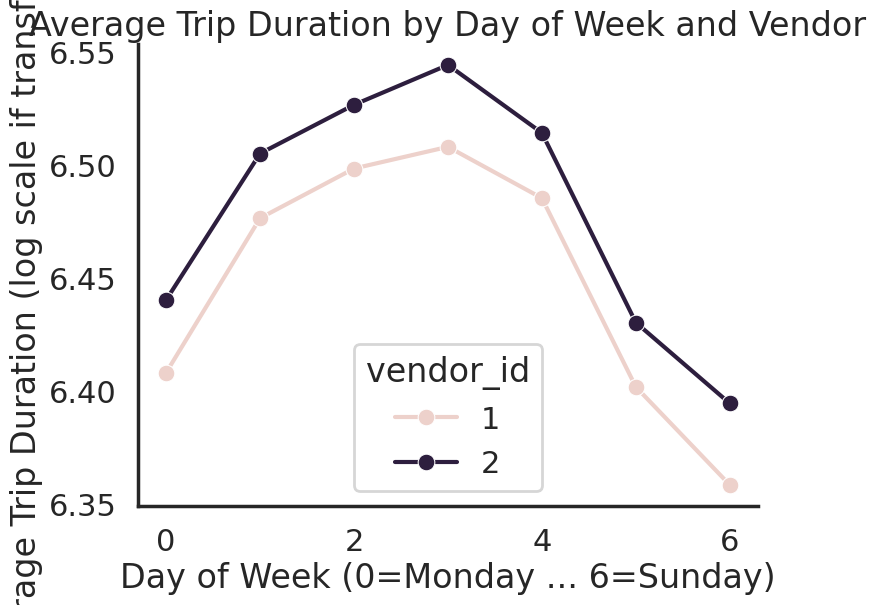

In [199]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


summary_wdays_avg_duration = (
    df.groupby(['vendor_id', 'pickup_dayofweek'])['trip_duration_log']
    .mean()
    .reset_index()
)

sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

plt.figure(figsize=(8,6))
sns.lineplot(
    data=summary_wdays_avg_duration,
    x="pickup_dayofweek",
    y="trip_duration_log",
    hue="vendor_id",
    marker="o"
)

plt.title("Average Trip Duration by Day of Week and Vendor")
plt.xlabel("Day of Week (0=Monday ... 6=Sunday)")
plt.ylabel("Average Trip Duration (log scale if transformed)")
sns.despine(bottom=False)

plt.show()


In [206]:
Q1 = df["euclidean_distance"].quantile(0.1)
Q3 = df["euclidean_distance"].quantile(0.9)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = (df["euclidean_distance"] < lower) | (df["euclidean_distance"] > upper)

print("Outlier count:", outliers.sum())
print("Outlier percentage:", 100 * outliers.sum() / len(df), "%")


Outlier count: 1484
Outlier percentage: 0.1484 %


In [207]:
mean_val = df["euclidean_distance"].mean()
df.loc[outlier, "euclidean_distance"] = mean_val


In [208]:
corr = df.corr()

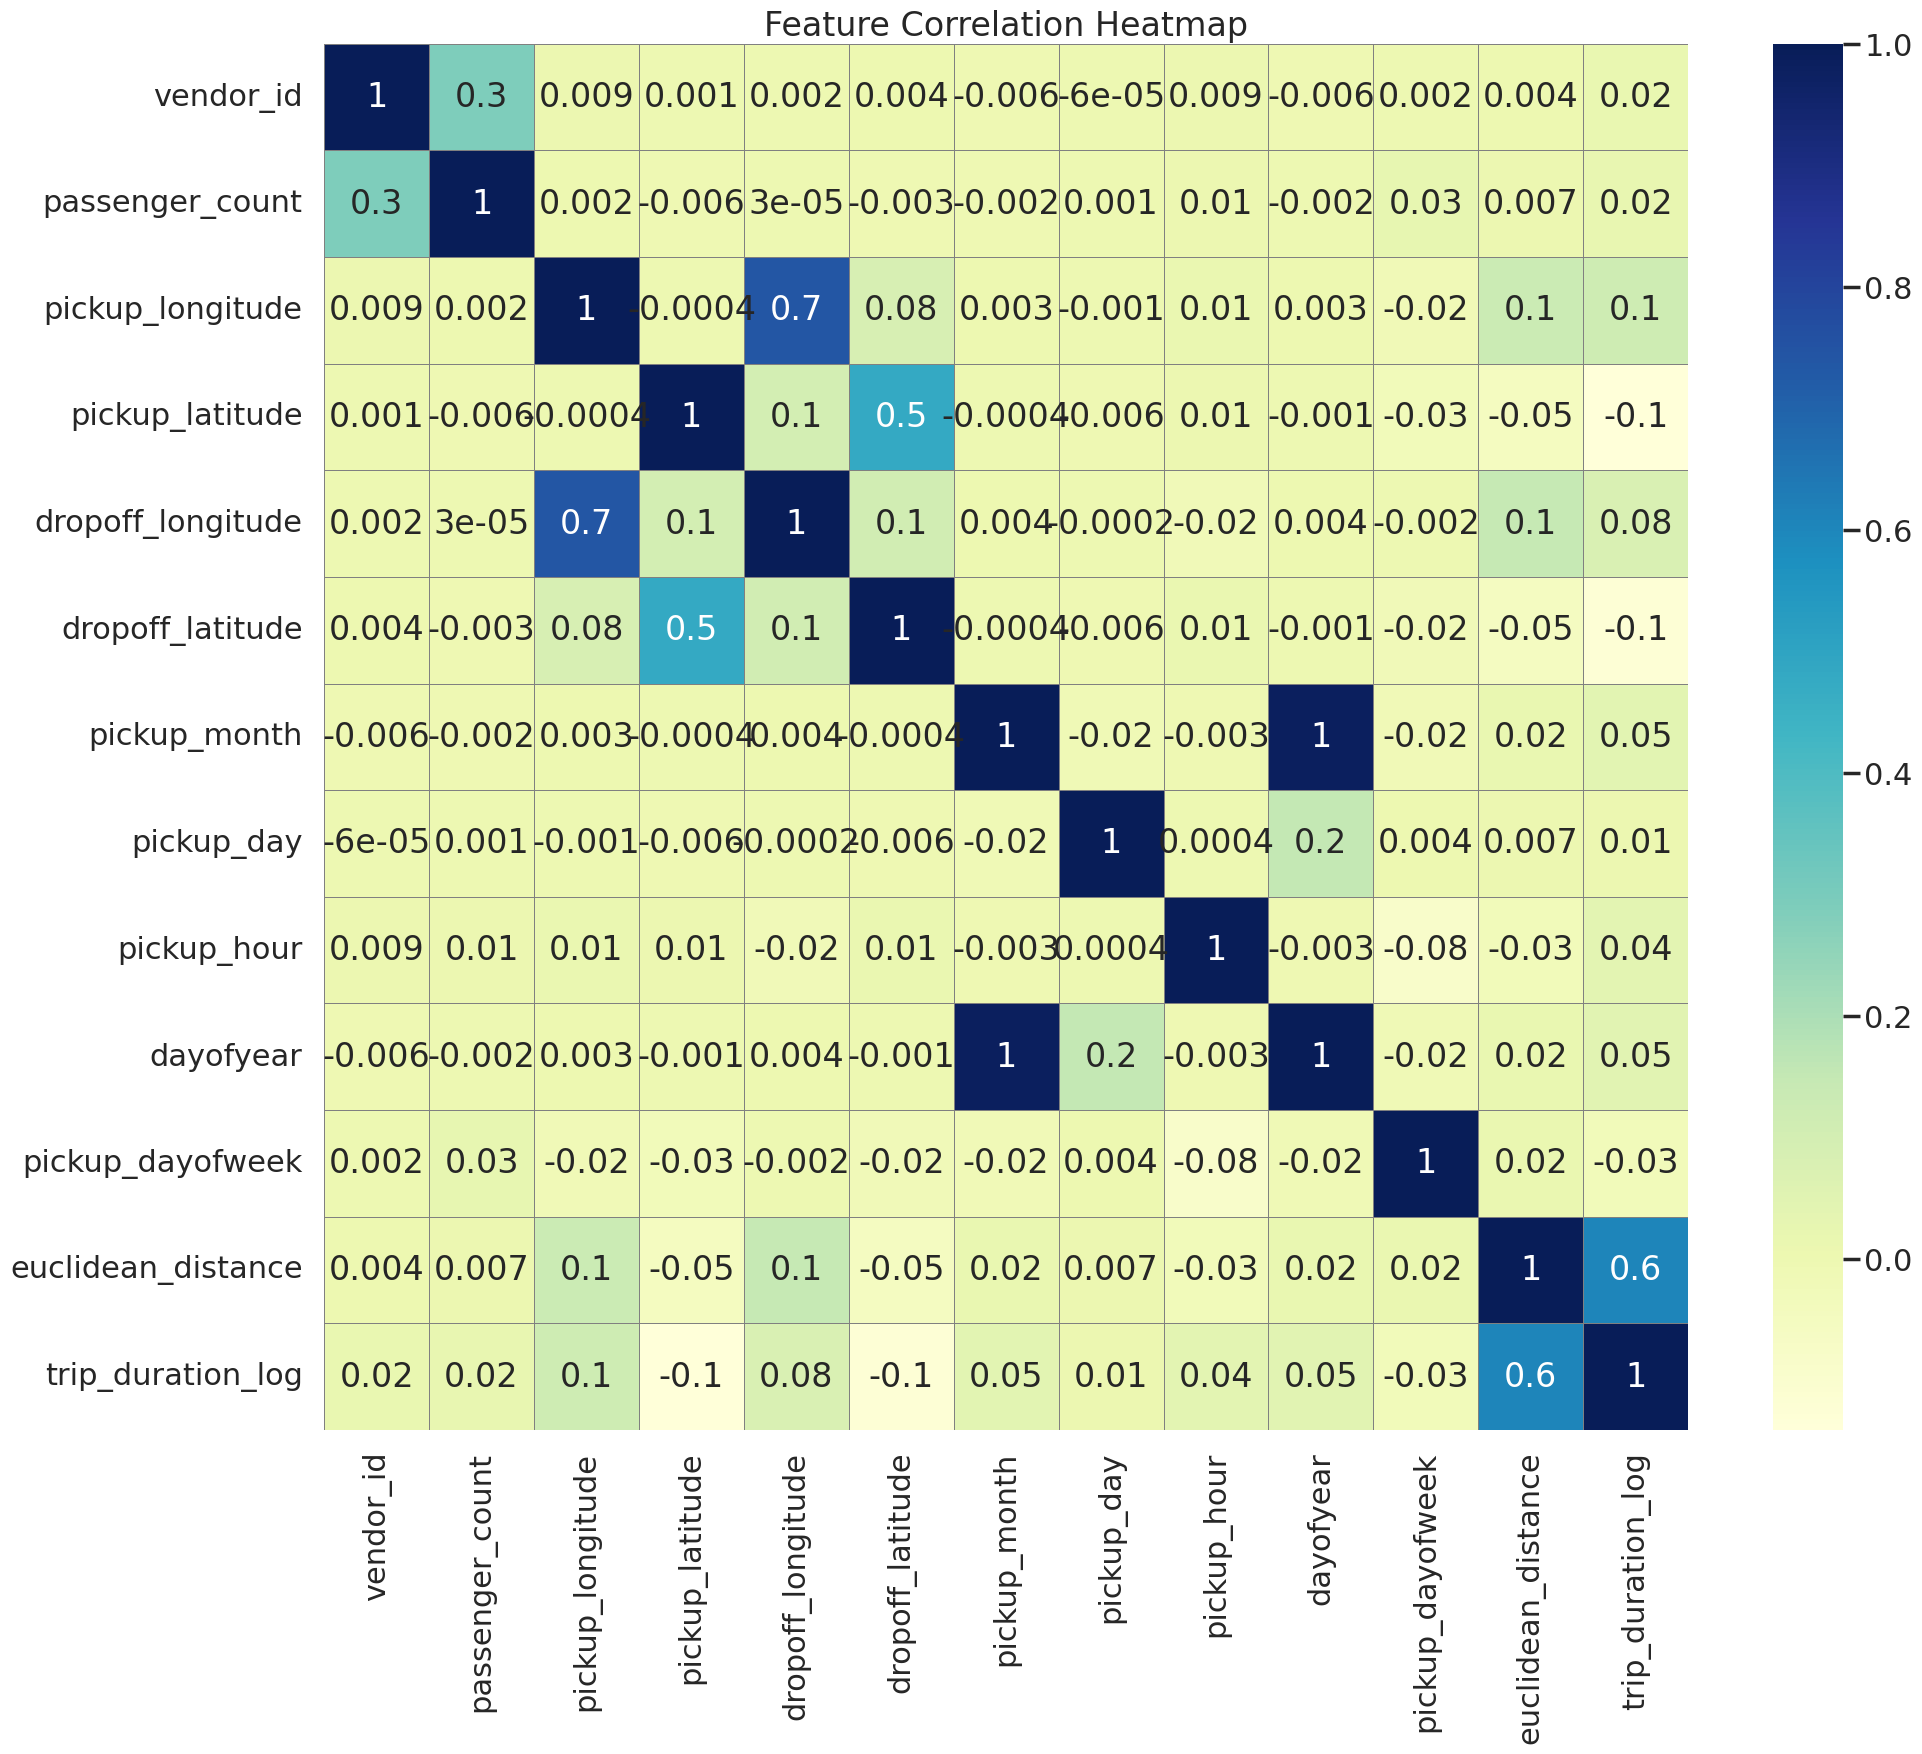

In [209]:
plt.figure(figsize=(22, 18))

ax = sns.heatmap(df.corr(), annot=True, fmt=".1g", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Feature Correlation Heatmap")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x79b6314f16a0>,
 'caps': [<matplotlib.lines.Line2D at 0x79b6314f1cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b6314f1400>],
 'medians': [<matplotlib.lines.Line2D at 0x79b6314f2300>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b6314f2570>],
 'means': []}

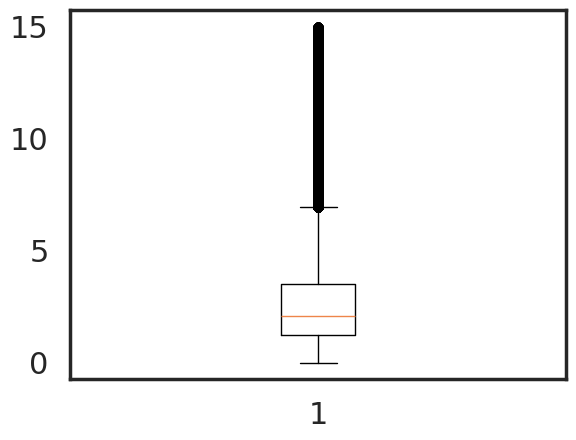

In [210]:
plt.boxplot(df["euclidean_distance"])

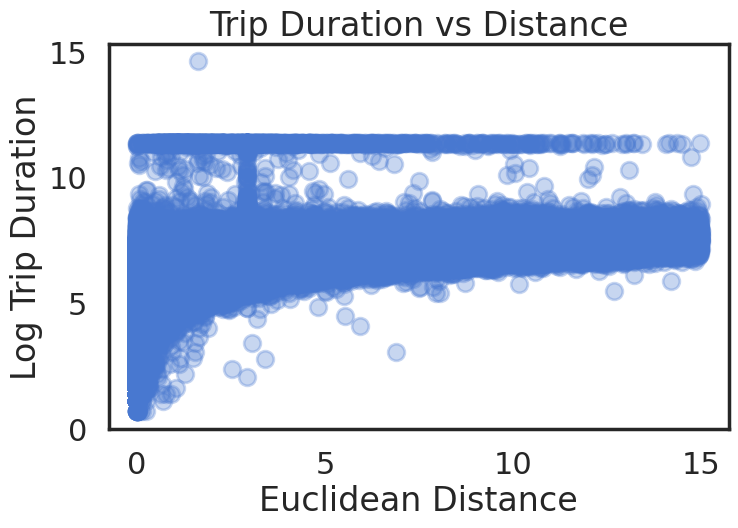

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["euclidean_distance"], df["trip_duration_log"], alpha=0.3)
plt.xlabel("Euclidean Distance")
plt.ylabel("Log Trip Duration")
plt.title("Trip Duration vs Distance")
plt.show()
